Итоговая работа
=====================

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).


Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# data = pd.read_csv('F:\\Program\\git_base\\GitHub\\MyRepo\\DVP_FIN\\taxi.csv')
# Так как на рабочем компе работает криво, сменим директорию
data = pd.read_csv('C:\\ProgramData\\Anaconda3\\Scripts\\taxi.csv')
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [4]:
data.describe(include='all')

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Economy,private,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48335,91207,NaN
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,NaN,NaN,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,NaN,NaN,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,NaN,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,NaN,NaN,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,NaN,NaN,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,NaN,NaN,1.000000


In [9]:
import pandas_profiling
# pandas_profiling.ProfileReport(data)
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="PandasProfiling.html")

F:\Python\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


### Описание набора данных

* Кол-во строк 100 000.   
* Всего 14 признаков. Из них, предварительно: 9 числовых, 2 категориальных, 1 булевый и 2 непонятных (Rejected)


Предупреждения (Warnings)

* weekday_key -  14.4% нулевых значений
* hour_key has 6646 / 6.6% нулевых значений
* driver_latitude is highly skewed (γ1 = -26.369) Сильно скошен
* driver_longitude is highly correlated with driver_latitude (ρ = 0.9862) Сильная корреляция.
* origin_order_latitude is highly skewed (γ1 = -80.541) Сильно скошен  
* origin_order_longitude is highly skewed (γ1 = -72.689) Сильно скошен  
* distance_km is highly skewed (γ1 = 65.397) Сильно скошен  
* duration_min is highly correlated with distance_km (ρ = 0.97703) Высокая корреляция.

Оценка:
* Рассмотреть пропуски в признаках weekday_key, hour_key.
* Скос в координатах нормально, т.к. место одно и то же.
* Корреляция между duration_min и distance_km - обоснованно, т.к. действительно зависят. Можно оставить 1 из показателей.
* Какой таргет?

####  Разбираем показатели отдельно. 
**offer_gk**

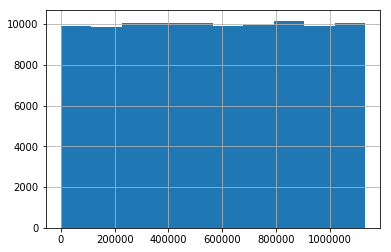

In [12]:
# Проверим распределение
data['offer_gk'].hist()

In [13]:
# Посмотрим из каких значений он состоит
print(data['offer_gk'].nunique(), data['offer_gk'].count())

100000 100000


Скорее всего это ID заказа, т.е. не числовое значение. Промежуточно, можно убрать из расчетов.  
Предполагаю, что признаки **driver_gk** и **order_gk** являются аналогичными

**weekday_key**

Профайлинг показывает, что **weekday_key** имеет 14.4% нулевых значений. Скорее всего обозначение 0 - Воскресенье и т.д.  (0-6)

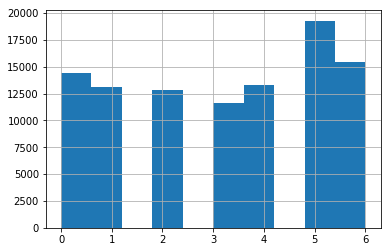

In [16]:
# Проверим распределение
data['weekday_key'].hist()

Данные дня недели - категориальные

**hour_key** - номер часа, может понадобится для группировки в временные отрезки и т.д. Нулевые значения, это просто 12 часов ночи

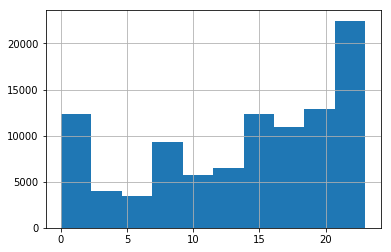

In [17]:
# Проверим распределение
data['hour_key'].hist()

Предположение: наиболее часто берут такси вечером и ночью, что логично.

**Координаты водителя и заказа**:  
driver_latitude	  
driver_longitude	  
origin_order_latitude  	
origin_order_longitude  


На данном этапе не вижу, зачем требуются данные признаки для задачи.  
Предположения: 
1. Вычислить районы и локации (зачем?)
2. Определить расстояние между водителем и заказом (зачем, т.к. есть параметр расстояние. Как? вроде есть библиотека)

**distance_km, duration_min**  
Большое кол-во значений (более четверти) -1. Судя по всему это пропуски # Около четверти значений без указания расстояния. Это очень много, нужно придумать, что дальше с этим делать
Так же видно, что duration_min коррелирует с данным признаком.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B671780>,
      dtype=object)

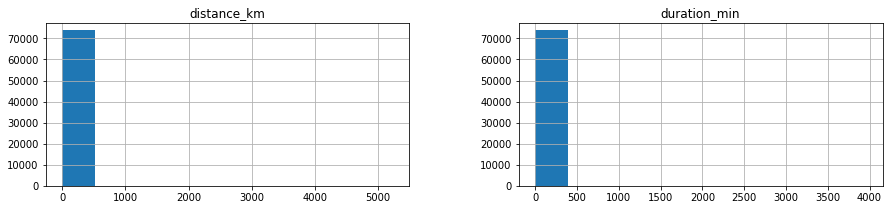

In [53]:
# Посмотрим распределение значений без -1
data.query('distance_km != -1')[['distance_km', 'duration_min']].hist(figsize = (15,3))
# data.query('distance_km != -1')[['distance_km']].hist()

**offer_class_group**  
Скорее всего это класс заявки

In [54]:
data['offer_class_group'].unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

Категориальный признак. Можно использовать One-hot encoding

**ride_type_desc**  
Тип поездки: private, business, affiliate, SMB

**driver_response**  
Булевый признак, скорее всего взял заказ или нет. Предполагаю, это таргет.

## Описание зависимостей

In [58]:
# По профайлингу корреляция отсутствует.
# Построим матрицу только с учетом числовых значений.

In [64]:
# data_new = data[['offer_gk','weekday_key','hour_key', 'driver_gk', 'order_gk', 'driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude', 'distance_km', 'duration_min', 'offer_class_group', 'ride_type_desc', 'driver_response']]
data_new = data[['distance_km', 'duration_min', 'offer_class_group', 'ride_type_desc', 'driver_response']]

In [65]:
data_new.head()

,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,-1.000,-1.000,Economy,private,0
1,18.802,25.217,Standard,private,1
2,6.747,9.800,Economy,private,0
3,-1.000,-1.000,Economy,private,1
4,12.383,19.250,Economy,private,1


https://www.crowdanalytix.com/contests/mckinsey-big-data-hackathon

offer_gk
weekday_key	hour_key	
driver_gk	
order_gk	
driver_latitude	
driver_longitude	
origin_order_latitude	
origin_order_longitude	
distance_km	duration_min	
offer_class_group	
ride_type_desc	
driver_response

In [11]:
# https://ru.stackoverflow.com/questions/1021590/Расчет-расстояния-по-нескольким-координатам-python


**driver_response** - Скорее всего, таргет


offer_gk – unique offer identifier (INT)  
weekday_key – day of week number (Sunday = 0, Monday = 1, etc.) (INT)  
hour_key – hour of day representing an hour part of datetime (value from 0 to 23) (INT)  
driver_gk – unique driver identifier (INT)  
order_gk – unique order identifier (INT). Order may have multiple offers  

Широта и долгота водителя и заказа  
driver_latitude           100000 non-null float64  
driver_longitude          100000 non-null float64  
origin_order_latitude     100000 non-null float64  
origin_order_longitude    100000 non-null float64  

distance_km – estimated distance from origin to destination in kilometres (FLOAT). Value -1 means that the destination is not set
duration_min – estimated duration from origin to destination in minutes (FLOAT). Value -1 means that the destination is not set

offer_class_group – class of the order, e.g. Economy, Business, XL (VARCHAR)  
ride_type_desc – private or business order attribute (VARCHAR)

Скорее всего таргет  

driver_response – driver choice of whether to accept the offer or not (VARCHAR) 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB
